In [1]:
import numpy as np

In [24]:
# Độ dài của vector
def compute_vector_length(vector):
    len_of_vector = np.sqrt(sum(vector**2))
    # len_of_vector = np.linalg.norm(vector)
    return len_of_vector


vector = np.array([-2, 4, 9, 21])
print(compute_vector_length(vector))

23.280893453645632


In [25]:
# Phép tích vô hướng
def compute_dot_product(vector1, vector2):
    # result = np.dot(vector1, vector2)
    result = vector1.dot(vector2)
    return result


x = np.array([0, 1, -1, 2])
y = np.array([2, 5, 1, 0])
print(compute_dot_product(x, y))

4


In [26]:
# Nhân vector với ma trận
def matrix_multi_vector(matrix, vector):
    if matrix.shape[1] != vector.shape[0]:
        return None

    result = matrix.dot(vector)
    return result


matrix_1 = np.array([[-1, 1, 1], [0, -4, 9]])
vector = np.array([0, 2, 1])

print(matrix_multi_vector(matrix_1, vector))

[3 1]


In [ ]:
# Nhân ma trận với ma trận


def matrix_multi_matrix(matrix1, matrix2):
    if matrix1.shape[1] != matrix2.shape[0]:
        matrix2 = matrix2.T
        if matrix1.shape[1] != matrix2.shape[0]:
            return None

    result = matrix1.dot(matrix2)
    return result


matrix_1 = np.array([[1, 2, 3], [4, 5, 6]])
matrix_2 = np.array([[1, 2], [4, 6], [2, 5]])
matrix_3 = np.array([[1, 5, 3], [1, 7, 6]])
matrix_4 = np.array([[1, 5, 3], [1, 7, 6], [3, 4, 9]])


print(matrix_multi_matrix(matrix_1, matrix_2))
print(matrix_multi_matrix(matrix_1, matrix_3))
print(matrix_multi_matrix(matrix_4, matrix_2))

[[15 29]
 [36 68]]
[[20 33]
 [47 75]]
[[27 47]
 [41 74]
 [37 75]]


In [ ]:
# Cosine Similarity
def compute_cosine(v1, v2):
    # tính tích vô hướng
    dot_product = np.dot(v1, v2)

    # Tính chuẩn euclid (norm) của mỗi vector
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)

    # Kiểm tra norm của v1, v2 khác 0
    if norm_v1 == 0 or norm_v2 == 0:
        return None

    cos_sim = dot_product / (norm_v1 * norm_v2)

    return cos_sim


vec_a = np.array([1, 2, 3, 4])
vec_b = np.array([1, 0, 3, 0])
vec_c = np.array([5, 6, 7])
print(compute_cosine(vec_a, vec_b))

0.5773502691896257


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Đọc hình và resize lại cho cùng kích thước
path = "./data/"
bg1_image = cv2.imread(path + "GreenBackground.png", 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

ob_image = cv2.imread(path + "Object.png", 1)
ob_image = cv2.resize(ob_image, (678, 381))

bg2_image = cv2.imread(path + "NewBackground.jpg", 1)
bg2_image = cv2.resize(bg2_image, (678, 381))

uint8


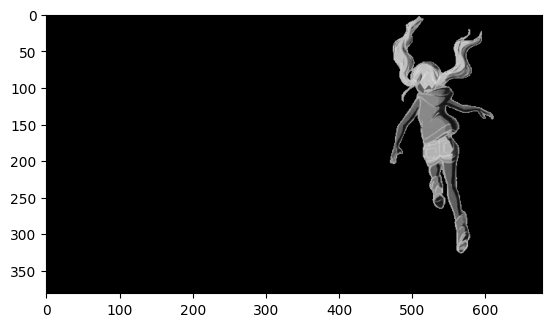

In [ ]:
def compute_difference(bg_img, ob_img):
    # return np.abs(bg_img - ob_img)
    return np.abs(bg_img - ob_img).mean(axis=2)


diff = compute_difference(bg1_image, ob_image)

# diff = cv2.absdiff(bg1_image, ob_image)
plt.imshow(cv2.cvtColor(diff.astype(np.uint8), cv2.COLOR_BGR2RGB))

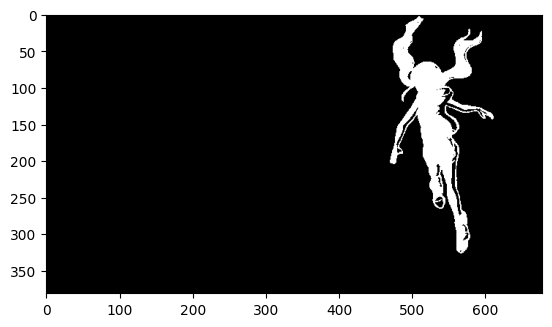

In [ ]:
def compute_binary_mask(difference_single_channel):
    return (difference_single_channel > 50).astype(np.uint8) * 255


binary_mask = compute_binary_mask(diff)
plt.imshow(cv2.cvtColor(binary_mask, cv2.COLOR_BGR2RGB))

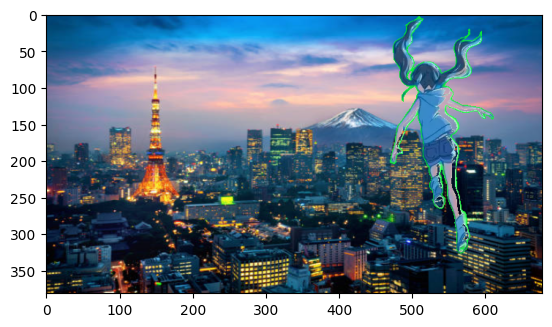

In [ ]:
def replace_background(bg1_image, bg2_image, ob_image):
    difference_single_channel = compute_difference(bg1_image, ob_image)

    binary_mask = compute_binary_mask(difference_single_channel)
    binary_mask = np.expand_dims(
        binary_mask, axis=2
    )  # Thêm chiều vào binary_mask để biến thành 3 kênh
    output = np.where(binary_mask == 255, ob_image, bg2_image)
    return output


output = replace_background(bg1_image, bg2_image, ob_image)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

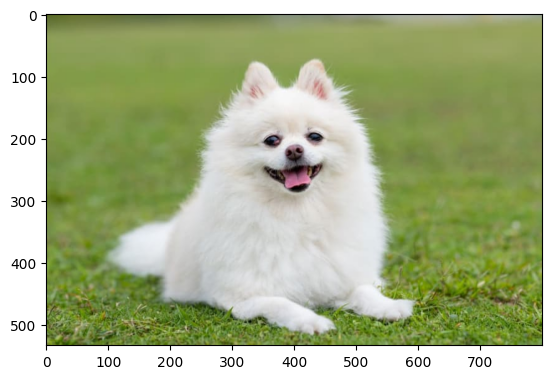

In [11]:
# Đọc ảnh bằng matplotlib.image
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import cv2

path = "./data/"
img = mpimg.imread(path + "dog.jpeg")
plt.imshow(img)

In [ ]:
max_rgb = np.max(img, axis=2)
min_rgb = np.min(img, axis=2)
gray_img_01 = (max_rgb + min_rgb) / 2.0
print(gray_img_01[0, 0])

102.5


In [ ]:
gray_img_02 = np.sum(img, axis=2) / 3.0
print(gray_img_02[0, 0])

107.66666666666667


In [13]:
gray_img_03 = 0.21 * img[:, :, 0] + 0.72 * img[:, :, 1] + 0.07 * img[:, :, 2]
print(gray_img_03[0, 0])

126.22999999999999


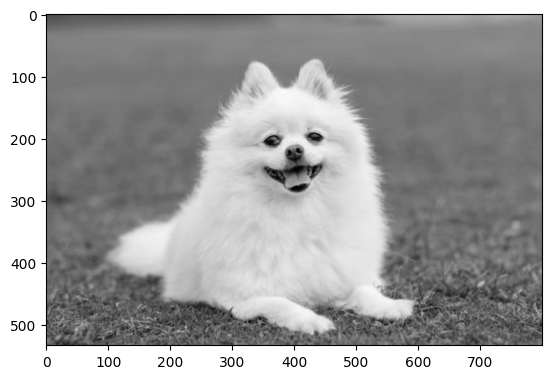

In [8]:
vector = np.array([1 / 3.0, 1 / 3.0, 1 / 3.0])
gray_img_04 = img @ vector
gray_img_04 = gray_img_04.astype(np.uint8)
plt.imshow(cv2.cvtColor(gray_img_04, cv2.COLOR_BGR2RGB))

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(path + "advertising.csv")

df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [21]:
data = df.to_numpy()
data

array([[230.1,  37.8,  69.2,  22.1],
       [ 44.5,  39.3,  45.1,  10.4],
       [ 17.2,  45.9,  69.3,  12. ],
       [151.5,  41.3,  58.5,  16.5],
       [180.8,  10.8,  58.4,  17.9],
       [  8.7,  48.9,  75. ,   7.2],
       [ 57.5,  32.8,  23.5,  11.8],
       [120.2,  19.6,  11.6,  13.2],
       [  8.6,   2.1,   1. ,   4.8],
       [199.8,   2.6,  21.2,  15.6],
       [ 66.1,   5.8,  24.2,  12.6],
       [214.7,  24. ,   4. ,  17.4],
       [ 23.8,  35.1,  65.9,   9.2],
       [ 97.5,   7.6,   7.2,  13.7],
       [204.1,  32.9,  46. ,  19. ],
       [195.4,  47.7,  52.9,  22.4],
       [ 67.8,  36.6, 114. ,  12.5],
       [281.4,  39.6,  55.8,  24.4],
       [ 69.2,  20.5,  18.3,  11.3],
       [147.3,  23.9,  19.1,  14.6],
       [218.4,  27.7,  53.4,  18. ],
       [237.4,   5.1,  23.5,  17.5],
       [ 13.2,  15.9,  49.6,   5.6],
       [228.3,  16.9,  26.2,  20.5],
       [ 62.3,  12.6,  18.3,   9.7],
       [262.9,   3.5,  19.5,  17. ],
       [142.9,  29.3,  12.6,  15. ],
 

In [ ]:
sales = data[:, -1]
max_value = np.max(sales)
max_index = np.argmax(sales)

print(max_value)
print(max_index)

27.0
175


In [ ]:
tv = data[:, 0]
mean_tv = np.mean(tv)
print(mean_tv)

147.0425


In [23]:
count = np.sum(sales >= 20)
print(count)

40


In [ ]:
radio = data[:, 1]
mean_radio = np.mean(radio[sales >= 15])
print(mean_radio)

26.22293577981651


In [ ]:
newspaper = data[:, 2]
mean_news = np.mean(newspaper)

total_sales = np.sum(sales[newspaper > mean_news])
print(total_sales)

1405.1
